# Pattern recognition - MsCV ViBOT

Guillaume Lemaitre - Fabrice Meriaudeau - Joan Massich

In [1]:

%matplotlib inline
%pprint off

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np


Pretty printing has been turned OFF


## Features Normalisation

Given the following scope:

* The dataset is composed of 3 patients,
* Each patient is composed of 2 classes,
* Each class follow a Gaussian distribution with 400 samples,
* Both classes are merged in a single matrix with a corresponding ground-truth.

The following Python code allows to generate the aforementioned dataset.

In [2]:

# Define the number of data points to generate for each patient
n_pos_class, n_neg_class = 400, 400

# Define the different means and stds
mean_1_pos, std_1_pos, mean_1_neg, std_1_neg = .25, .5, 1.5, .5
mean_2_pos, std_2_pos, mean_2_neg, std_2_neg = .5, 1.25, 1.75, 1.25
mean_3_pos, std_3_pos, mean_3_neg, std_3_neg = 10.25, .5, 11.5, .5

# Generate the data
### Patient #1
### Data
pt_data_1 = np.concatenate((np.random.normal(mean_1_pos, std_1_pos, n_pos_class), \
                            np.random.normal(mean_1_neg, std_1_neg, n_neg_class)), \
                            axis = 0)
### Ground-truth
pt_gt_1 = np.concatenate((np.ones(n_pos_class), np.zeros(n_neg_class)), axis = 0)
### Patient #2
### Data
pt_data_2 = np.concatenate((np.random.normal(mean_2_pos, std_2_pos, n_pos_class), \
                            np.random.normal(mean_2_neg, std_2_neg, n_neg_class)), \
                            axis = 0)
### Ground-truth
pt_gt_2 = np.concatenate((np.ones(n_pos_class), np.zeros(n_neg_class)), axis = 0)
### Patient #3
### Data
pt_data_3 = np.concatenate((np.random.normal(mean_3_pos, std_3_pos, n_pos_class), \
                            np.random.normal(mean_3_neg, std_3_neg, n_neg_class)), \
                            axis = 0)
### Ground-truth
pt_gt_3 = np.concatenate((np.ones(n_pos_class), np.zeros(n_neg_class)), axis = 0)


The PDFs associated with patient and class can be presented.

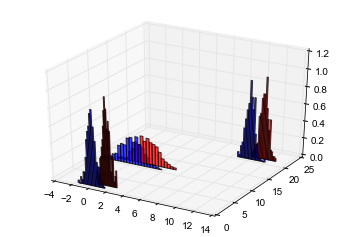

In [3]:

# Plot the different class
nb_bins = 20

# Create a figure
fig = plt.figure()
# Get the axes
ax = fig.add_subplot(111, projection='3d')

# PDF for patient #1
### Plot the histogram of the class #1
bins, n = np.histogram(pt_data_1[np.nonzero(pt_gt_1 == 1)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 0, zdir='y', color='b', alpha=0.75, width=n[1]-n[0], edgecolor='none')
### Plot the histogram of the class #2
bins, n = np.histogram(pt_data_1[np.nonzero(pt_gt_1 == 0)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 1, zdir='y', color='r', alpha=0.75, width=n[1]-n[0], edgecolor='none')

# PDF for patient #2
### Plot the histogram of the class #1
bins, n = np.histogram(pt_data_2[np.nonzero(pt_gt_2 == 1)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 10, zdir='y', color='b', alpha=0.75, width=n[1]-n[0], edgecolor='none')
### Plot the histogram of the class #2
bins, n = np.histogram(pt_data_2[np.nonzero(pt_gt_2 == 0)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 11, zdir='y', color='r', alpha=0.75, width=n[1]-n[0], edgecolor='none')

# PDF for patient #3
### Plot the histogram of the class #1
bins, n = np.histogram(pt_data_3[np.nonzero(pt_gt_3 == 1)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 20, zdir='y', color='b', alpha=0.75, width=n[1]-n[0], edgecolor='none')
### Plot the histogram of the class #2
bins, n = np.histogram(pt_data_3[np.nonzero(pt_gt_3 == 0)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 21, zdir='y', color='r', alpha=0.75, width=n[1]-n[0], edgecolor='none')

plt.show()


To illustrate the issue with features normalisation, a simple classification (cf., logistic regression classifier) will be performed using Leave-One-Patient-Out cross-validation. It means that, you will iteratively train the classifier with 2 patients and test the trained classifier with the remaining patient.

Iteration #1: the mean accuracy is 50.00%


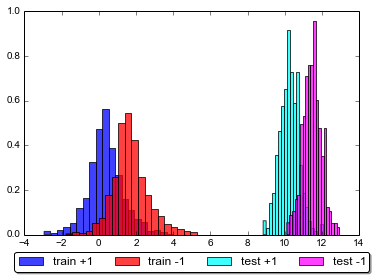

Iteration #2: the mean accuracy is 50.00%


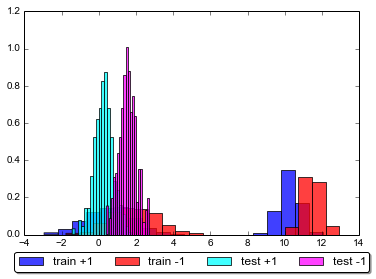

Iteration #3: the mean accuracy is 50.00%


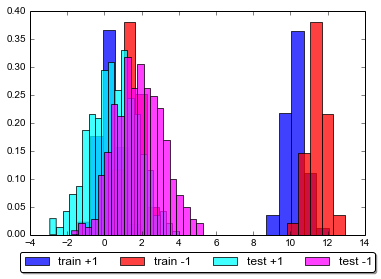

In [4]:

# Import logistic regression algorithm
from sklearn.linear_model import LogisticRegression

nb_bins = 20

# Constructor
lr_class = LogisticRegression()

### First iteration - Train with patient #1-#2 and test with patient #3
# Define the training and testing
training_data = np.asmatrix(np.concatenate((pt_data_1, pt_data_2))).T
training_label = np.concatenate((pt_gt_1, pt_gt_2))
testing_data = np.asmatrix(pt_data_3).T
testing_label = pt_gt_3
# Train the classifier
lr_class.fit(training_data, training_label)
# Test the classifier
print 'Iteration #1: the mean accuracy is {0:.2f}%'.format(lr_class.score(testing_data, testing_label) * 100)

fig = plt.figure()
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 1)], \
                            nb_bins, normed=1, alpha=0.75, label='train +1')
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 0)], \
                            nb_bins, normed=1, facecolor='red', alpha=0.75, label='train -1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 1)], \
                            nb_bins, normed=1, facecolor='cyan', alpha=0.75, label='test +1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 0)], \
                            nb_bins, normed=1, facecolor='magenta', alpha=0.75, label='test -1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)
plt.show()

### Second iteration - Train with patient #3-#2 and test with patient #1
# Define the training and testing
training_data = np.asmatrix(np.concatenate((pt_data_3, pt_data_2))).T
training_label = np.concatenate((pt_gt_3, pt_gt_2))
testing_data = np.asmatrix(pt_data_1).T
testing_label = pt_gt_1
# Train the classifier
lr_class.fit(training_data, training_label)
# Test the classifier
print 'Iteration #2: the mean accuracy is {0:.2f}%'.format(lr_class.score(testing_data, testing_label) * 100)

fig = plt.figure()
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 1)], \
                            nb_bins, normed=1, alpha=0.75, label='train +1')
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 0)], \
                            nb_bins, normed=1, facecolor='red', alpha=0.75, label='train -1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 1)], \
                            nb_bins, normed=1, facecolor='cyan', alpha=0.75, label='test +1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 0)], \
                            nb_bins, normed=1, facecolor='magenta', alpha=0.75, label='test -1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)
plt.show()

### Third iteration - Train with patient #3-#1 and test with patient #2
# Define the training and testing
training_data = np.asmatrix(np.concatenate((pt_data_3, pt_data_1))).T
training_label = np.concatenate((pt_gt_3, pt_gt_1))
testing_data = np.asmatrix(pt_data_2).T
testing_label = pt_gt_2
# Train the classifier
lr_class.fit(training_data, training_label)
# Test the classifier
print 'Iteration #3: the mean accuracy is {0:.2f}%'.format(lr_class.score(testing_data, testing_label) * 100)

fig = plt.figure()
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 1)], \
                            nb_bins, normed=1, alpha=0.75, label='train +1')
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 0)], \
                            nb_bins, normed=1, facecolor='red', alpha=0.75, label='train -1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 1)], \
                            nb_bins, normed=1, facecolor='cyan', alpha=0.75, label='test +1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 0)], \
                            nb_bins, normed=1, facecolor='magenta', alpha=0.75, label='test -1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)
plt.show()

(a) Comment the results obtained and explain the reason(s) for low performance of the classifier.

(b) Normalise each patient data so that they follow a Gaussian distribution with wero mean and a unit variance.

In [ ]:

# Normalise the data
### Subtract the mean and divide by the std
### Use np.mean() and np.std()
pt_data_1 = pt_data_1-np.mean(pt_data_1) 
pt_data_1 = pt_data_1/np.std(pt_data_1)

pt_data_2 = pt_data_2-np.mean(pt_data_2) 
pt_data_2 = pt_data_2/np.std(pt_data_2)

pt_data_3 = pt_data_3-np.mean(pt_data_3) 
pt_data_3 = pt_data_3/np.std(pt_data_3)


Once the data normalised, you can observe the their PDFs are aligned.

In [ ]:

# Plot the different class
nb_bins = 20

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

bins, n = np.histogram(pt_data_1[np.nonzero(pt_gt_1 == 1)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 0, zdir='y', color='b', alpha=0.75, width=n[1]-n[0], edgecolor='none')
bins, n = np.histogram(pt_data_1[np.nonzero(pt_gt_1 == 0)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 1, zdir='y', color='r', alpha=0.75, width=n[1]-n[0], edgecolor='none')

bins, n = np.histogram(pt_data_2[np.nonzero(pt_gt_2 == 1)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 10, zdir='y', color='b', alpha=0.75, width=n[1]-n[0], edgecolor='none')
bins, n = np.histogram(pt_data_2[np.nonzero(pt_gt_2 == 0)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 11, zdir='y', color='r', alpha=0.75, width=n[1]-n[0], edgecolor='none')

bins, n = np.histogram(pt_data_3[np.nonzero(pt_gt_3 == 1)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 20, zdir='y', color='b', alpha=0.75, width=n[1]-n[0], edgecolor='none')
bins, n = np.histogram(pt_data_3[np.nonzero(pt_gt_3 == 0)], nb_bins, normed = True)
ax.bar(n[0:-1], bins, 21, zdir='y', color='r', alpha=0.75, width=n[1]-n[0], edgecolor='none')

plt.show()


In [ ]:

nb_bins = 20

### First iteration - Train with patient #1-#2 and test with patient #3
# Define the training and testing
training_data = np.asmatrix(np.concatenate((pt_data_1, pt_data_2))).T
training_label = np.concatenate((pt_gt_1, pt_gt_2))
testing_data = np.asmatrix(pt_data_3).T
testing_label = pt_gt_3
# Train the classifier
lr_class.fit(training_data, training_label)
# Test the classifier
print 'Iteration #1: the mean accuracy is {0:.2f}%'.format(lr_class.score(testing_data, testing_label) * 100)

fig = plt.figure()
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 1)], \
                            nb_bins, normed=1, alpha=0.75, label='train +1')
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 0)], \
                            nb_bins, normed=1, facecolor='red', alpha=0.75, label='train -1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 1)], \
                            nb_bins, normed=1, facecolor='cyan', alpha=0.75, label='test +1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 0)], \
                            nb_bins, normed=1, facecolor='magenta', alpha=0.75, label='test -1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)
plt.show()

### Second iteration - Train with patient #3-#2 and test with patient #1
# Define the training and testing
training_data = np.asmatrix(np.concatenate((pt_data_3, pt_data_2))).T
training_label = np.concatenate((pt_gt_3, pt_gt_2))
testing_data = np.asmatrix(pt_data_1).T
testing_label = pt_gt_1
# Train the classifier
lr_class.fit(training_data, training_label)
# Test the classifier
print 'Iteration #2: the mean accuracy is {0:.2f}%'.format(lr_class.score(testing_data, testing_label) * 100)

fig = plt.figure()
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 1)], \
                            nb_bins, normed=1, alpha=0.75, label='train +1')
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 0)], \
                            nb_bins, normed=1, facecolor='red', alpha=0.75, label='train -1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 1)], \
                            nb_bins, normed=1, facecolor='cyan', alpha=0.75, label='test +1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 0)], \
                            nb_bins, normed=1, facecolor='magenta', alpha=0.75, label='test -1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)
plt.show()

### Third iteration - Train with patient #3-#1 and test with patient #2
# Define the training and testing
training_data = np.asmatrix(np.concatenate((pt_data_3, pt_data_1))).T
training_label = np.concatenate((pt_gt_3, pt_gt_1))
testing_data = np.asmatrix(pt_data_2).T
testing_label = pt_gt_2
# Train the classifier
lr_class.fit(training_data, training_label)
# Test the classifier
print 'Iteration #3: the mean accuracy is {0:.2f}%'.format(lr_class.score(testing_data, testing_label) * 100)

fig = plt.figure()
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 1)], \
                            nb_bins, normed=1, alpha=0.75, label='train +1')
n, bins, patches = plt.hist(training_data[np.nonzero(training_label == 0)], \
                            nb_bins, normed=1, facecolor='red', alpha=0.75, label='train -1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 1)], \
                            nb_bins, normed=1, facecolor='cyan', alpha=0.75, label='test +1')
n, bins, patches = plt.hist(testing_data[np.nonzero(testing_label == 0)], \
                            nb_bins, normed=1, facecolor='magenta', alpha=0.75, label='test -1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)
plt.show()


(c) Comments the results. Explain why, the patient #2 as test data lead to lower classification accuracy.

The class data for patient 2 is not distinguishable between the positive and negative classes. The relatively large region of overlap leads to a lower classification accuracy. 